In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import klib

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import joblib

In [2]:
sns.set()

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
boston_df.drop('MEDV', axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('MEDV', axis=1), boston_df['MEDV'], test_size=0.20, random_state=42)

In [10]:
training_data = X_train.copy()
training_data['MEDV'] = y_train.values

In [11]:
test_data = X_test.copy()
test_data['MEDV'] = y_test.values

In [12]:
training_data.shape, test_data.shape

((404, 14), (102, 14))

## Finding out Details about the Data Structures and the Values

In [13]:
training_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


In [15]:
training_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Lets visualize the data

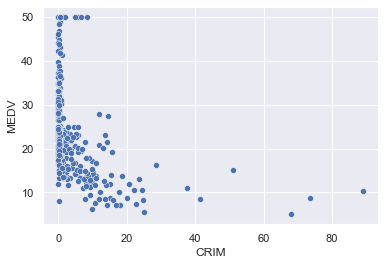

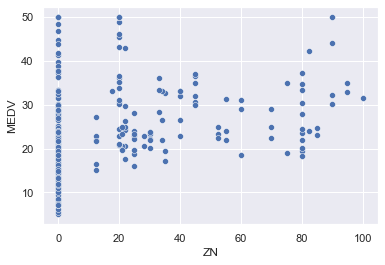

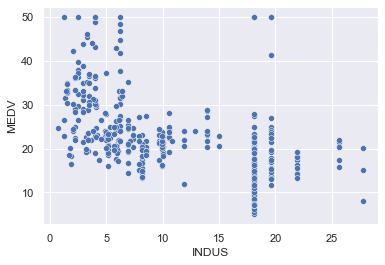

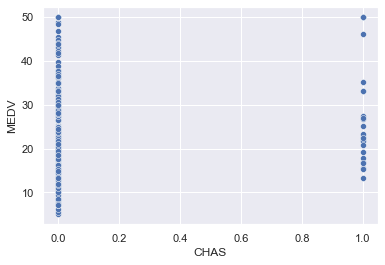

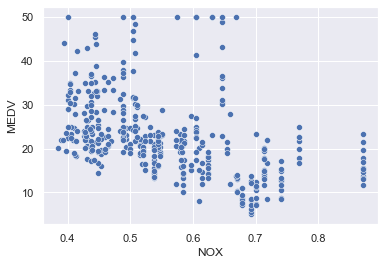

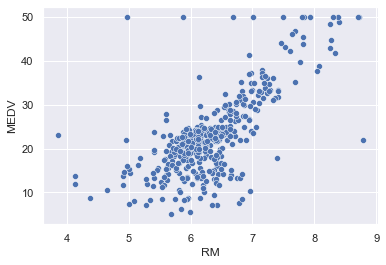

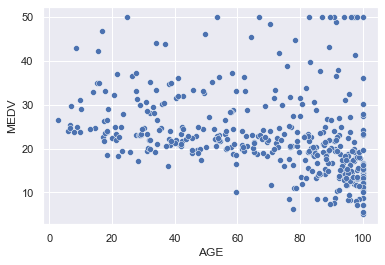

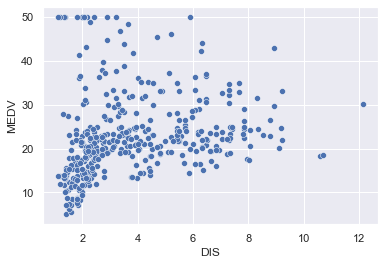

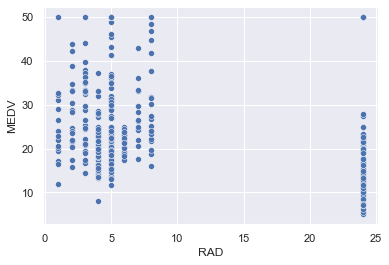

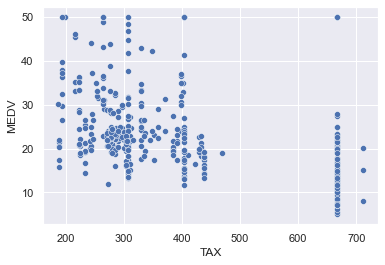

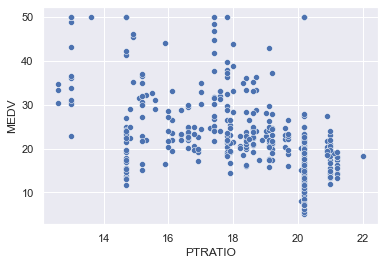

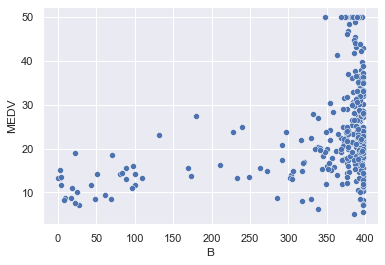

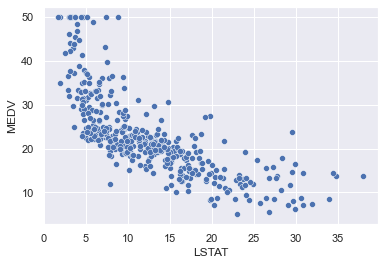

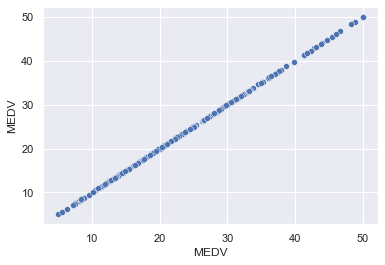

In [16]:
for i in training_data:
    sns.scatterplot(x=i, y='MEDV', data=training_data)
    plt.show()

## There are some features which shows some linear trend with the target

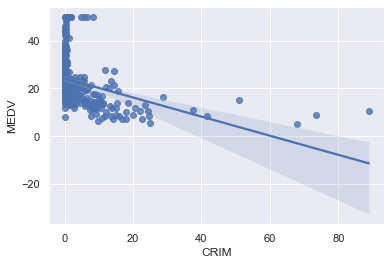

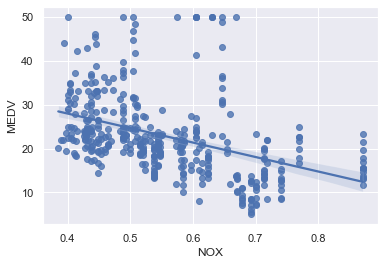

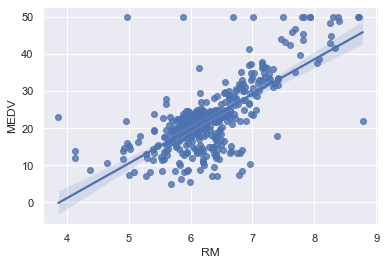

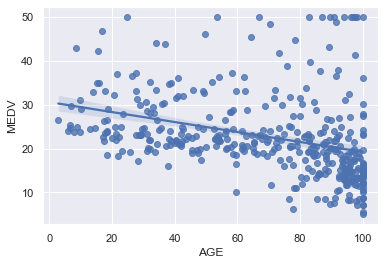

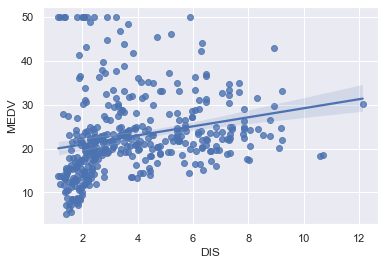

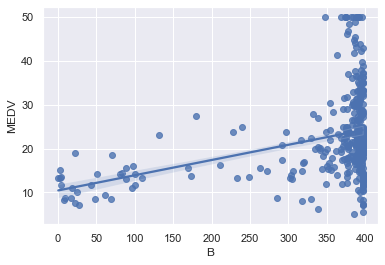

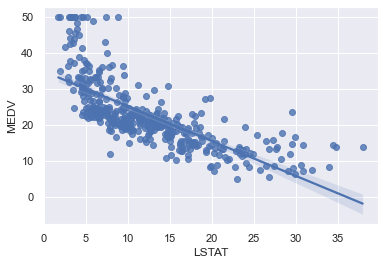

In [17]:
for i in ['CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'B', 'LSTAT']:
    sns.regplot(x=i, y='MEDV', data=training_data)
    plt.show()

## Checking the Correlation

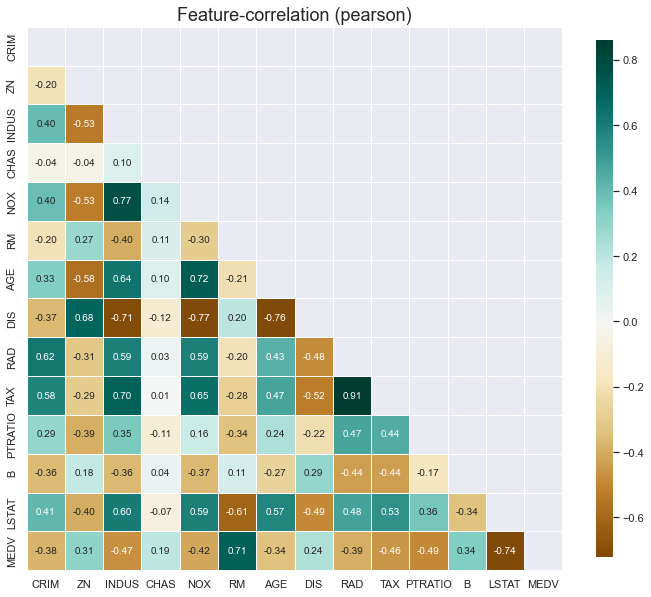

In [18]:
klib.corr_plot(training_data)
plt.show()

### Variance Influence Factor

In [19]:
[(training_data.columns[i], variance_inflation_factor(training_data.values, i)) for i in range(len(training_data.columns))]

[('CRIM', 2.027822467795769),
 ('ZN', 3.1094479873177634),
 ('INDUS', 13.749577173560924),
 ('CHAS', 1.2045980712743567),
 ('NOX', 75.17734195694689),
 ('RM', 144.32777042398695),
 ('AGE', 20.91465179681188),
 ('DIS', 16.152763396424586),
 ('RAD', 15.338104564238074),
 ('TAX', 61.46045042837525),
 ('PTRATIO', 84.25238251574584),
 ('B', 21.356526056456783),
 ('LSTAT', 12.203621176190419),
 ('MEDV', 26.125780057777003)]

In [20]:
corr_matrix = training_data.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
B          0.339918
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

## Certain Inferences
1. Places where the crimate rate is high the median value of the housing price decreases slightly. (Some housing prices are capped at 50)
2. Higher value of NOX indicates presence of Industries or Heavy Traffic resulting in decrease in Housing Prices.
3. As the Number of room increases, the housing prices increases, resulting in higher correlation.
4. As the age increases, the value of houses decreases.
5. Lower status people lives in less valued houses (High Negative Correlation)

## There are some Categorical Features Present.

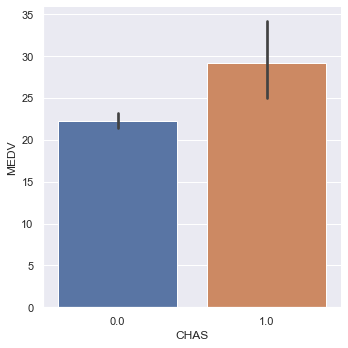

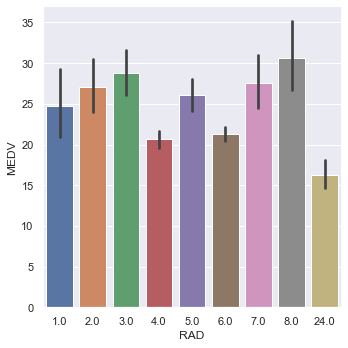

In [22]:
# plotting few of the categorical features
for i in ['CHAS', 'RAD']:
    sns.catplot(x = i, y='MEDV', data=training_data, kind='bar')
    

### Places where the lower status of the population is more, the crime rate is high. The graph below proves this.

<AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>

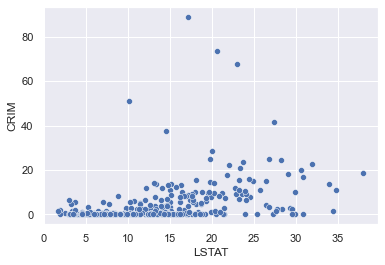

In [23]:
sns.scatterplot(x = 'LSTAT', y='CRIM', data=training_data)

In [24]:
categorical_cols = ['CHAS', 'RAD']
numerical_cols = ['CRIM', 'ZN' , 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [25]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num_encoder', num_pipeline, numerical_cols),
    ('cat_encoder', OneHotEncoder(), categorical_cols)    
])

In [26]:
prepared_data = full_pipeline.fit_transform(training_data.drop("MEDV", axis=1))
prepared_data 

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.        ,
         0.        ,  1.        ],
       [-0.33638447, -0.50032012, -0.41315956, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40325332,  1.01327135, -0.71521823, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.        ,
         0.        ,  1.        ],
       [-0.38135592, -0.50032012, -0.35216694, ...,  0.        ,
         0.        ,  0.        ]])

In [27]:
prepared_target = num_pipeline.fit_transform(training_data[['MEDV']])
prepared_target

array([[-1.15835310e+00],
       [-3.10767296e-01],
       [-3.64411967e-01],
       [-1.00814802e+00],
       [-4.93159177e-01],
       [ 1.93492610e-01],
       [-1.82020086e-01],
       [ 2.04221544e-01],
       [-1.51240792e+00],
       [ 5.04631701e-01],
       [-2.24935823e-01],
       [ 1.43804897e+00],
       [ 9.44518002e-01],
       [-1.19053990e+00],
       [ 1.82429061e+00],
       [-9.54503347e-01],
       [-1.06917547e-01],
       [ 9.69322024e-02],
       [-5.57532783e-01],
       [ 1.72034742e-01],
       [-1.50167899e+00],
       [-3.85869836e-01],
       [ 2.68595149e-01],
       [-2.57122626e-01],
       [ 3.25585973e-02],
       [ 1.62044086e+00],
       [-7.72111466e-01],
       [ 2.42511092e+00],
       [-7.61382532e-01],
       [-2.10860736e-02],
       [-8.90129742e-01],
       [-4.39514507e-01],
       [-5.36074914e-01],
       [-7.18466795e-01],
       [-2.35664757e-01],
       [ 9.44518002e-01],
       [ 6.76294648e-01],
       [-7.72111466e-01],
       [-5.6

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, prepared_target)

LinearRegression()

In [29]:
lin_reg.intercept_

array([0.06553184])

In [30]:
lin_reg.coef_

array([[-0.10950456,  0.09693313,  0.04255811, -0.2267302 ,  0.32592762,
        -0.02283334, -0.35023061, -0.11212107, -0.21591662,  0.12311236,
        -0.3874996 , -0.13876124,  0.13876124, -0.29835094, -0.18319347,
         0.20820145, -0.10519906, -0.0107644 , -0.25679646,  0.16829708,
         0.14569547,  0.33211034]])

In [31]:
y_pred = lin_reg.predict(prepared_data)

In [32]:
lin_reg.score(prepared_data, prepared_target)

0.7628270050876917

In [33]:
np.sqrt(mean_squared_error(y_pred, prepared_target))

0.4870041015354063

In [34]:
cross_val_score(estimator=lin_reg, X=prepared_data, y=prepared_target, cv=5, n_jobs=-1)

array([0.79534835, 0.63675104, 0.76036776, 0.78045084, 0.69261134])

### Testing with the Hold Out Dataset

In [35]:
testing_data = X_test.copy()
testing_data[y_test.name] = y_test
testing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0.0,0.740,6.461,93.3,2.0026,24.0,666.0,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0.0,0.597,6.657,100.0,1.5275,24.0,666.0,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0.0,0.449,6.015,45.1,4.4272,3.0,247.0,18.5,395.99,12.86,22.5


In [36]:
testing_data_prepared = full_pipeline.transform(testing_data.drop('MEDV', axis = 1))
testing_target = num_pipeline.transform(testing_data[['MEDV']])

In [37]:
y_pred = lin_reg.predict(testing_data_prepared)

In [38]:
np.sqrt(mean_squared_error(y_pred, testing_target))

0.534495243523618

In [39]:
np.mean(testing_target)

-0.14036657711960251

In [40]:
np.std(testing_target)

0.9187738501452531

In [41]:
# joblib.dump(lin_reg, 'Linear-Regression-Model.pkl')

In [42]:
num_pipeline.inverse_transform(y_pred)

array([[28.95938976],
       [35.34238717],
       [16.4501836 ],
       [24.56335068],
       [18.69676207],
       [23.80091425],
       [17.09701118],
       [14.68163026],
       [23.03343738],
       [18.59883455],
       [24.75971588],
       [18.53773923],
       [-5.96972091],
       [22.25944919],
       [19.20840064],
       [26.10978695],
       [19.78384213],
       [ 5.98059468],
       [39.95502765],
       [17.55026406],
       [29.71077873],
       [29.61827054],
       [10.78149747],
       [22.53623074],
       [17.84863954],
       [15.97205694],
       [23.40504414],
       [14.3412455 ],
       [21.60476337],
       [17.17607815],
       [22.52306808],
       [25.12597271],
       [25.79863486],
       [17.74520134],
       [16.81287037],
       [17.49142884],
       [29.95309159],
       [19.7500369 ],
       [22.92866134],
       [24.13555818],
       [11.9879759 ],
       [33.26087014],
       [42.19372349],
       [16.99337343],
       [26.30948705],
       [17

In [43]:
np.sqrt(mean_squared_error(testing_data[['MEDV']], num_pipeline.inverse_transform(y_pred)))

4.98181119056927

In [44]:
np.mean(testing_data[['MEDV']])

MEDV    21.488235
dtype: float64

In [45]:
np.std(testing_data[['MEDV']])

MEDV    8.563515
dtype: float64

In [46]:
min(testing_data['MEDV']), max(testing_data['MEDV'])

(5.0, 50.0)

In [47]:
boston_df.iloc[0].values

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00, 2.400e+01])

In [48]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [49]:
# joblib.dump(full_pipeline, 'column_transformer.pkl')

In [50]:
# joblib.dump(num_pipeline, 'numerical_transformer.pkl')

In [51]:
r2 = r2_score(y_true=testing_target, y_pred=y_pred)
r2

0.6615687658684821